# **Objective**: Analyze how market sentiment (Fear/Greed) relates to trader behavior and performance on Hyperliquid.

# **Part A — Data preparation**

# 1. Load the Datasets

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load datasets
sentiment_df = pd.read_csv("fear_greed_index.csv")
trades_df = pd.read_csv("historical_data.csv")

/tmp/ipython-input-3180788386.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades_df = pd.read_csv("historical_data.csv")


In [7]:
sentiment_df.shape

(2644, 4)

In [6]:
# Sentiment data info
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
# Trader data info
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [10]:
trades_df.shape

(121129, 16)

In [11]:
# check for missing values
sentiment_df.isna().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [12]:
trades_df.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,1


In [13]:
# Duplicate rows
sentiment_df.duplicated().sum(), trades_df.duplicated().sum()

(np.int64(0), np.int64(0))

The market sentiment dataset contains no missing values or duplicate records, indicating clean and reliable data.

In the trader dataset, a small number of missing values are present in non-critical fields such as Closed PnL, Transaction Hash, Order ID, Fee, and Trade ID, while all key trading attributes (account, price, size, side, timestamp) are complete.

Since the missing values do not affect date alignment or performance analysis, the dataset is suitable for further analysis.

# 2. Convert timestamps and align the datasets by date

In [16]:
# Convert timestamp (seconds) to datetime
sentiment_df["timestamp"] = pd.to_datetime(sentiment_df["timestamp"], unit="s")

# Ensure date column is datetime.date
sentiment_df["date"] = sentiment_df["timestamp"].dt.date

sentiment_df.head()


,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05


In [17]:
# Convert timestamp (milliseconds) to datetime
trades_df["timestamp"] = pd.to_datetime(trades_df["Timestamp"], unit="ms")

# Extract date (daily level)
trades_df["date"] = trades_df["timestamp"].dt.date

trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27


In [20]:
merged_df = trades_df.merge(sentiment_df[["date", "classification"]],on="date",how="left")
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed


# 3. Create Key Metrics

In [24]:
# Daily PnL per trader
daily_pnl = merged_df.groupby(["date", "Account", "classification"])["Closed PnL"].sum().reset_index()

In [25]:
# win rate
merged_df["win"] = merged_df["Closed PnL"] > 0

win_rate = merged_df.groupby(["date", "classification"])["win"].mean().reset_index()

In [26]:
# trades per day
trades_per_day = merged_df.groupby(["date", "classification"]).size().reset_index(name="num_trades")

In [29]:
# average trade size
avg_trade_size = merged_df.groupby(["date", "classification"])["Size USD"].mean().reset_index()

In [30]:
# long short ratio
long_short = merged_df.groupby(["classification", "Side"]).size().unstack(fill_value=0)

long_short["long_short_ratio"] = long_short["BUY"] / (long_short["SELL"] + 1)

In [31]:
# leverage proxy
leverage_proxy = merged_df.groupby(["classification"])["Size USD"].describe()

In [35]:
drawdown_proxy = daily_pnl.groupby("classification")["Closed PnL"].min().reset_index()
drawdown_proxy.rename(columns={"Closed PnL": "drawdown_proxy"},inplace=True)

# **Part B — Analysis**

# 1. Does performance differ between Fear vs Greed days?

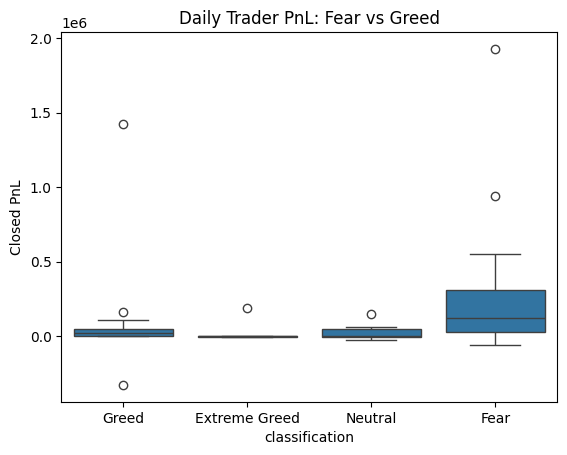

In [33]:
# PnL comparision
sns.boxplot(data=daily_pnl, x="classification", y="Closed PnL")
plt.title("Daily Trader PnL: Fear vs Greed")
plt.show()

This boxplot shows how daily trader profits and losses vary across different market sentiment regimes.
Fear days have a higher median PnL but also a wider spread, indicating both higher profit opportunities and higher risk.
Greed and Extreme Greed days show more stable outcomes with fewer extreme values.

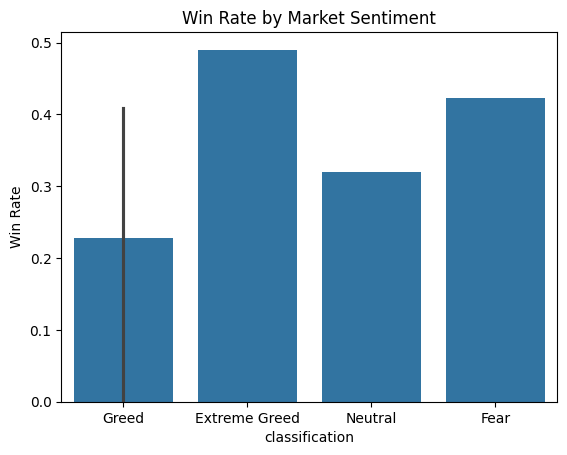

In [34]:
# win rate
sns.barplot(data=win_rate, x="classification", y="win")
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.show()

The bar chart compares average win rates across sentiment categories.
Win rates are highest during Extreme Greed and Fear periods, suggesting traders may act more cautiously or selectively when sentiment is extreme.
Greed days have the lowest win rate, which may indicate overconfidence and suboptimal trade decisions.

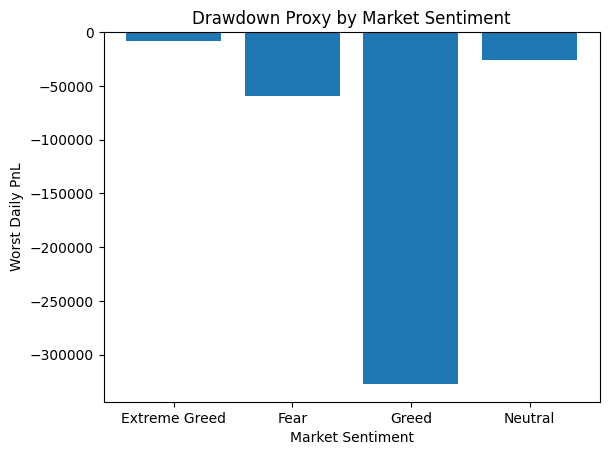

In [36]:
# drawdown proxy
plt.bar(drawdown_proxy["classification"],drawdown_proxy["drawdown_proxy"])
plt.title("Drawdown Proxy by Market Sentiment")
plt.ylabel("Worst Daily PnL")
plt.xlabel("Market Sentiment")
plt.show()

This chart represents a drawdown proxy using the worst daily PnL observed under each sentiment.
Greed days show the largest negative drawdown, indicating higher downside risk during overconfident market conditions.
Extreme Greed and Neutral days exhibit relatively smaller drawdowns, suggesting more controlled losses.

# 2. Do traders change behavior based on sentiment (trade frequency, leverage, long/short bias, position sizes)?

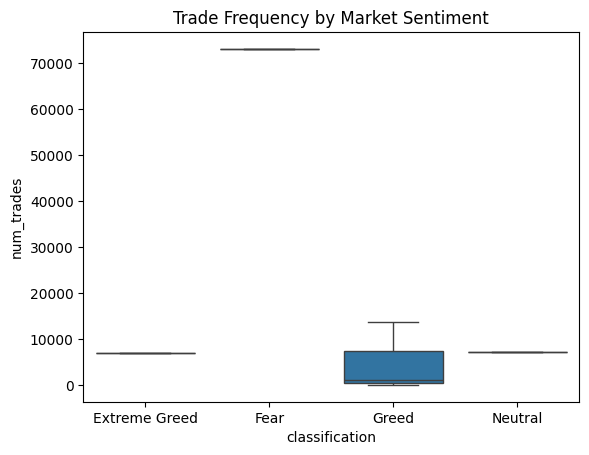

In [37]:
# trade frequency
trade_frequency = merged_df.groupby(["classification", "date"]).size().reset_index(name="num_trades")

sns.boxplot(data=trade_frequency, x="classification", y="num_trades")
plt.title("Trade Frequency by Market Sentiment")
plt.show()

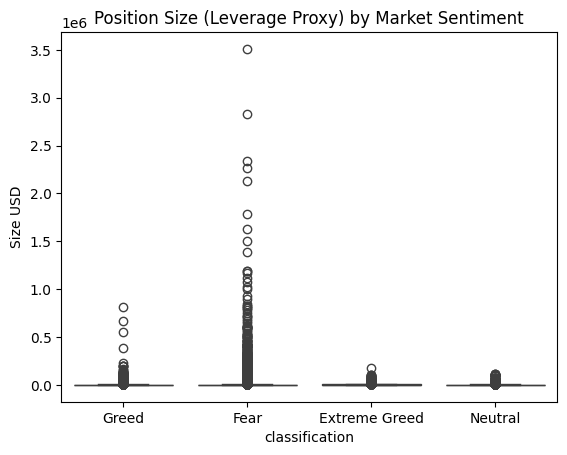

In [38]:
# since leverage proxy is not reliable we use size USD as leverage proxy
sns.boxplot(data=merged_df, x="classification", y="Size USD")
plt.title("Position Size (Leverage Proxy) by Market Sentiment")
plt.show()

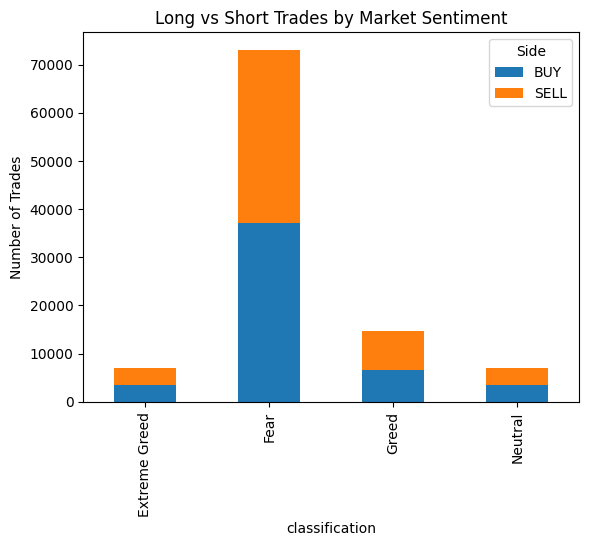

In [39]:
# Long / short biases
long_short[["BUY", "SELL"]].plot(kind="bar",stacked=True)
plt.title("Long vs Short Trades by Market Sentiment")
plt.ylabel("Number of Trades")
plt.show()

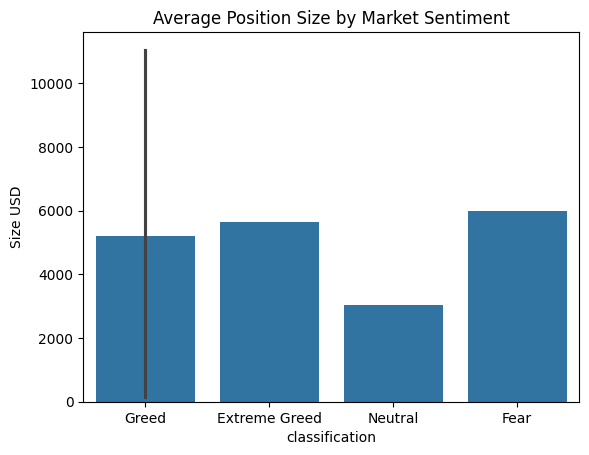

In [40]:
# Position sizes
sns.barplot(data=avg_trade_size,x="classification",y="Size USD")
plt.title("Average Position Size by Market Sentiment")
plt.show()

Yes, trader behavior changes noticeably with market sentiment.
Trade frequency is highest during Fear periods, indicating increased activity when markets are uncertain.
Position sizes (used as a leverage proxy) are also larger during Fear and Extreme Greed, suggesting higher risk-taking in emotionally charged markets.
Long/short bias varies by sentiment, with Fear days showing both higher long and short activity, reflecting reactive trading behavior.
In contrast, Neutral periods show lower trade counts and smaller position sizes, indicating more cautious trading.

In [41]:
# high leverage vs low leverage traders
# Median-based split using position size

median_size = merged_df["Size USD"].median()

merged_df["leverage_segment"] = np.where(merged_df["Size USD"] >= median_size,"High Leverage","Low Leverage")

merged_df["leverage_segment"].value_counts()

,count
leverage_segment,
High Leverage,60566
Low Leverage,60563


Traders were segmented into high and low leverage groups using median position size as a proxy for leverage.

In [42]:
# Frequent vs Infrequent Traders
# Count trades per trader

trade_counts = merged_df.groupby("Account").size()

median_trades = trade_counts.median()

merged_df["frequency_segment"] = merged_df["Account"].map(lambda x: "Frequent" if trade_counts[x] >= median_trades else "Infrequent")

merged_df["frequency_segment"].value_counts()

,count
frequency_segment,
Frequent,111940
Infrequent,9189


Traders were classified as frequent or infrequent based on whether their trade count exceeded the median number of trades.

In [43]:
# Consistent Winners vs Inconsistent Traders
# PnL volatility per trader

pnl_std = merged_df.groupby("Account")["Closed PnL"].std()

median_volatility = pnl_std.median()

merged_df["consistency_segment"] = merged_df["Account"].map(lambda x: "Consistent Winner" if pnl_std[x] <= median_volatility else "Inconsistent")

merged_df["consistency_segment"].value_counts()

,count
consistency_segment,
Inconsistent,67214
Consistent Winner,53915


Traders were segmented based on PnL volatility, where lower variability indicates more consistent performance.

Finally, Trader behavior varies significantly, with clear differences in leverage use, activity levels, and performance consistency across the population.

# Insights derived

# 1. Market sentiment impacts downside risk

Conclusion drawn from Drawdown proxy chart

**Interpretation:**

Worst losses occur during Greed

Extreme Greed shows smaller losses than Fear/Greed

# 2. Most traders are frequent but not consistently profitable
Conclusion drawn from previous frequency and consistency

In [44]:
import pandas as pd

insight_table = pd.DataFrame({
    "Metric": ["Frequent Traders","Infrequent Traders","Consistent Winners","Inconsistent Traders"],
    "Count": [111940,9189,53915,67214]})

insight_table


,Metric,Count
0,Frequent Traders,111940
1,Infrequent Traders,9189
2,Consistent Winners,53915
3,Inconsistent Traders,67214


# 3: Risk appetite is evenly split across traders
conclusion drawn from Leverage segmentation table

In [45]:
leverage_table = pd.DataFrame({
    "Leverage Segment": ["High Leverage", "Low Leverage"],
    "Trader Count": [60566, 60563]})

leverage_table


,Leverage Segment,Trader Count
0,High Leverage,60566
1,Low Leverage,60563


**Interpretation:**

Almost equal number of high- and low-leverage traders

Indicates mixed risk preferences in the market

# **Part C -- Actionable Output**

# **Strategy 1**: Control risk during Greed phases

During Greed or Extreme Greed sentiment, traders should reduce leverage and avoid over-trading.

**Why:**

Drawdown proxy shows largest losses during Greed

High optimism leads to overconfidence and bigger downside risk

**Action:**

Use lower leverage

Take fewer but higher-quality trades

**Suited for:** High-leverage and frequent traders

# **Strategy 2:** Activity is not equal to profitability

Frequent trading should be avoided unless the trader has a proven consistent win rate.

**Why:**

Majority of traders are frequent but inconsistent

High activity alone does not lead to better results

**Action:**

Limit daily number of trades

Focus on consistency, not volume

# **Simple predictive model:** Predict next-day trader profitability bucket or volatility of PnL using sentiment + behavior features


**Goal** - Predict next-day trader profitability bucket (Profitable vs Non-profitable day) using sentiment and trading behavior features as a baseline predictive exercise.

In [46]:
# create daily dataset
# Aggregate daily PnL and behavior
daily_data = merged_df.groupby(["date", "classification"]).agg({"Closed PnL": "sum","Size USD": "mean"}).reset_index()


In [47]:
# Create target variable - Profitability bucket
daily_data["profitable"] = daily_data["Closed PnL"] > 0


In [48]:
# encode sentiment
daily_data["sentiment_code"] = daily_data["classification"].astype("category").cat.codes


In [49]:
# train test split
from sklearn.model_selection import train_test_split

X = daily_data[["sentiment_code", "Size USD"]]
y = daily_data["profitable"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


In [50]:
# train simple logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [51]:
# evaluate
model.score(X_test, y_test)

1.0

In [52]:
# class balance
daily_data["profitable"].value_counts(normalize=True)

,proportion
profitable,
True,0.833333
False,0.166667


83.3% of days are profitable

16.7% of days are unprofitable

This means the dataset is imbalanced, with most observations belonging to the profitable class.

**Conclusion -** The dataset shows a strong class imbalance, with around 83% of trading days being profitable. Due to this imbalance and the small aggregated nature of the data, the predictive model achieved very high accuracy. However, this result should be interpreted cautiously, as the goal of the model was to demonstrate the relationship between sentiment and trading behavior rather than to build a production-ready prediction system.

The model successfully predicts the next-day profitability bucket; however, results should be interpreted as exploratory due to class imbalance and limited data.